In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dados_raw = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/2%20-%20Statistic/yellow_fever_statistic.csv')
dados_raw.head()

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,M,19,8,2,1995,0,19
1,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,1,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,1,12
3,N,AM,TAPAUÁ,M,29,4,1,1996,1,26
4,N,AM,RIO PRETO DA EVA,M,38,4,1,1996,1,27


In [18]:
dados_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACRORREG_LPI  2652 non-null   object
 1   UF_LPI         2652 non-null   object
 2   MUN_LPI        2652 non-null   object
 3   SEXO           2652 non-null   object
 4   IDADE          2652 non-null   int64 
 5   SE_IS          2652 non-null   int64 
 6   MES_IS         2652 non-null   int64 
 7   ANO_IS         2652 non-null   int64 
 8   OBITO          2652 non-null   int64 
 9   DIA_IS         2652 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 207.3+ KB


<Axes: >

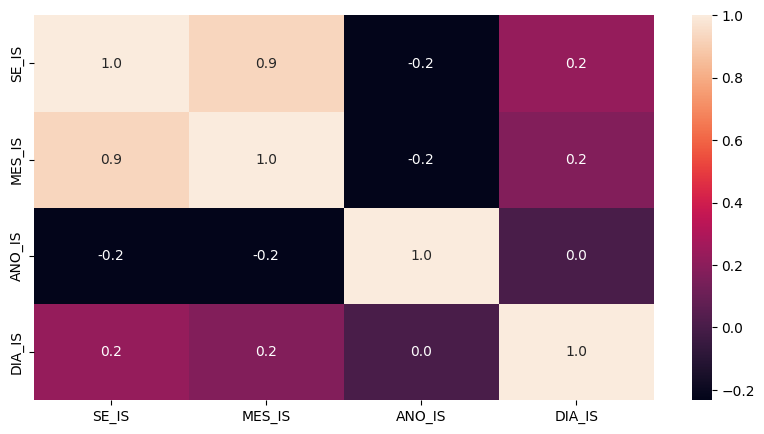

In [20]:
matriz = dados_raw[['SE_IS','MES_IS','ANO_IS','DIA_IS']].corr()
plt.figure(figsize = (10,5))
sns.heatmap(matriz, annot = True, fmt = ".1f")

In [21]:
dados_raw= dados_raw.drop('SE_IS', axis = 1)

In [22]:
dados_raw

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,M,19,2,1995,0,19
1,NE,MA,AMARANTE DO MARANHÃO,M,33,4,1995,1,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,4,1995,1,12
3,N,AM,TAPAUÁ,M,29,1,1996,1,26
4,N,AM,RIO PRETO DA EVA,M,38,1,1996,1,27
...,...,...,...,...,...,...,...,...,...
2647,S,SC,URUSSANGA,M,29,4,2021,0,22
2648,S,SC,ÁGUAS MORNAS,M,34,3,2021,1,19
2649,S,SC,TAIÓ,F,40,1,2021,0,6
2650,N,PA,AFUÁ,M,21,7,2021,1,7


In [23]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Criando uma coluna categórica fictícia
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(10)])
X['Categoria'] = ['A', 'B', 'A', 'B'] * 250  # Adicionando uma variável categórica

# Separando em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificando a variável categórica usando LabelEncoder
le = LabelEncoder()
X_train['Categoria_LabelEncoded'] = le.fit_transform(X_train['Categoria'])
X_test['Categoria_LabelEncoded'] = le.transform(X_test['Categoria'])

# Aplicando SelectKBest com f_classif
k_best_selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = k_best_selector.fit_transform(X_train.drop(['Categoria', 'Categoria_LabelEncoded'], axis=1), y_train)
X_test_selected = k_best_selector.transform(X_test.drop(['Categoria', 'Categoria_LabelEncoded'], axis=1))

# Treinando um modelo de RandomForest usando as características selecionadas
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Fazendo previsões e avaliando a precisão
y_pred = rf_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")


Acurácia do modelo: 0.94


In [24]:
X_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Categoria,Categoria_LabelEncoded
29,0.371967,-0.067007,0.479997,1.623480,-1.490996,1.470076,1.099151,1.217927,-0.240961,-2.373570,B,1
535,2.070324,1.464587,-0.590828,0.591667,1.497615,0.438780,2.896845,-0.025347,-0.162282,-0.353911,B,1
695,1.143504,-0.494064,-0.424899,-1.859175,0.336402,-0.181933,-1.101706,-0.622748,0.632121,2.854956,B,1
557,-0.203697,-0.042198,-1.242179,-1.189945,-0.063093,1.366014,-0.306214,-1.136450,0.597073,0.293876,B,1
836,0.613594,-4.008159,1.362065,0.246883,3.232119,-1.652753,1.974092,-0.505345,-1.016884,5.648851,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.274825,-0.309191,-0.233705,0.860286,2.458877,-0.160509,3.864784,2.188499,1.505791,2.270177,A,0
270,1.075854,0.607040,-0.527685,0.837255,-1.071172,2.352453,1.616891,0.703065,-0.648300,-2.175824,A,0
860,1.733099,-0.338795,-0.621769,-1.050389,1.269763,-0.185912,0.633752,0.254426,0.179071,2.685518,A,0
435,1.056475,0.448128,-1.623739,-1.403656,0.241782,-0.642160,-1.033562,0.073058,-0.627443,1.757763,B,1


In [25]:
X_train_selected

array([[ 0.37196708,  1.62348002, -1.49099596,  1.47007556, -2.37356983],
       [ 2.07032359,  0.59166715,  1.49761512,  0.43877996, -0.35391124],
       [ 1.14350388, -1.85917471,  0.33640166, -0.18193263,  2.85495581],
       ...,
       [ 1.73309938, -1.05038899,  1.26976258, -0.18591225,  2.68551835],
       [ 1.05647531, -1.40365577,  0.24178171, -0.64215954,  1.75776339],
       [-0.94123986, -2.32195994, -1.27755925, -0.87357811, -0.05541218]])